# Return of the Multi-Armed Bandit

## The Explore/Exploit dilemma
Explore - Collect lots of data, but we must be impartial and continue to collect data with low win-rates
Exploit - Choose the value with the highest win-rate but this would mean we stop collecting data from choices with low win rates.

The objective of each is opposed to the other, hence why it is called a dilemma.

### Adaptive Algorithms
1. Epsilon-greedy
2. Optimistic Initial Values
3. UCB1 (Upper Confidence Bound)
4. Thompson Sampling (Bayesian Bandit)

Can be used in place of A/B tests. They are methods that help us compensate for effect size, early stopage, and p-value considerations of more rigorous statistical methods.

### Applications of Explore-Exploit
* Advertising click-through rate (ratio of clicks / Total impressions) between two ads. 
    * We could setup and experiment to determine which ad is better, but due to the law of large numbers we know that we need to collect a lot of data in order to shrink the observed variance (reduce confidence intervals). However, if we show a sub-optimal ad to our customers we are choosing to reduce our profitability, because we could be showing them the add with a better CTR.
    * Fundamentally, we want to know which choice is better and to determine that fact as quickly as possible so we can exploit that fact as soon as we reach a reasonable confidence.

## Epsilon-Greedy

Objectives
* Need to balance explore and exploit
* Making choices based solely on the maximum likelyhood estimate (MLE), i.e. using observations we do have to calculate the maximum probability it could be: 1 win, 3 loss = MLE of 0.25, but it could be worse, doesn't work because we can end up chasing data down a single sub-optimal choice and never switch back to exploring other choices. 
* This is known as a **greedy** method: meaning only considering immediately available information such as the shortsighted observation that 1/4 is better than 0/1. A non-greedy method would also consider than 1 observation vs 4 observations needs to be considered when choosing the next opportunity.

Idea
* Don't always perform the greedy action
* Have a small probability of doing something random (i.e. take a non-greedy action)
* Epsilon (**$\epsilon$**) is the paramater for this random probability of taking a non-greedy action (make choice at random)
* 5% or 10% is a common $\epsilon$ value
* Determine when we have *enough* data so we stop choosing sub-optimal bandits (choices).
* We can calculate the expected value of the current choice using the current probabilities
* We can decay epsilon such that overtime (or as we see probabilities meeting some minimum expected threshold) the rate at which we make non-greedy choices is reduced.

Sample Mean

$\bar{X}_N =\frac{1}{N}\sum^{N}_{i=1} X_{i}$

However, calculating the sum in this way requires that we keep a list of $N$ sample means. This would make the computation space and time occur in $O(N)$ linear time. 

But if we are running a theoretically infinate experiment and we lack the capacity to store an infinitly sized $N$. 

As such, we must look for a method that is in constant time $O(1)$ and we can do this by keeping a running count and running mean. In other words we use the previous mean and count and the new mean to modify the mean with our new value.

Previous Mean at $N-1$:

$\bar{X}_N-1 =\frac{1}{N-1}\sum^{N-1}_{i=1} X_i$

Current Mean using mean at $N-1$:

$\bar{X}_N = \frac{1}N((N-1)\bar{X}_{N-1}+X_N)$
###### Frankly I'm a little stumped how to combine the equations to get this output, but I do understand how this works in code


In [ ]:
def calc_mean(data:list):
    # set starting values
    n = 0
    mean = 0
    # Iteratively update the count and the mean
    for x in data:
        n += 1
        delta = x - mean  # how large a diff between current value and mean
        mean += delta / n  # scale the difference by the new total count of values contributing to mean
    return mean

## Example Multi-Armed Bandit implementation of Epsilon-greedy

In [1]:
%matplotlib inline

In [2]:
from rl01.bandits import EpsilonGreedy

In [3]:
mab_c = EpsilonGreedy(nbandits=3, probs=[0.2, 0.5, 0.75], eps=0.1, ntrials=10000, decay="constant")
mab_l = EpsilonGreedy(nbandits=3, probs=[0.2, 0.5, 0.75], eps=0.1, ntrials=10000, decay="linear")
mab_e = EpsilonGreedy(nbandits=3, probs=[0.2, 0.5, 0.75], eps=0.1, ntrials=10000, decay="exponential")
mab_i = EpsilonGreedy(nbandits=3, probs=[0.2, 0.5, 0.75], eps=0.1, ntrials=10000, decay="inverse_sqrt")

In [4]:
for mab in (mab_c, mab_l, mab_e, mab_i):
    mab.experiment()
    print(mab.decay.name)
    mab.calc_metrics()
    print("---------------------------")

constant
Mean Estimate: ['1: 0.18328840970350396', '2: 0.4622093023255814', '3: 0.7558427571351629']
True Probability: ['1: 0.2', '2: 0.5', '3: 0.75']
Total Rewards Earned: 7245.0
Overall Win Rate: 0.7245
Times Explored: 1013
Times Exploited: 8987
Times Selected Optimal Bandit: 9285
---------------------------
linear
Mean Estimate: ['1: 0.22448979591836735', '2: 0.46153846153846156', '3: 0.7529257465698148']
True Probability: ['1: 0.2', '2: 0.5', '3: 0.75']
Total Rewards Earned: 7492.0
Overall Win Rate: 0.7492
Times Explored: 103
Times Exploited: 9897
Times Selected Optimal Bandit: 9912
---------------------------
exponential
Mean Estimate: ['1: 0.20454545454545456', '2: 0.47727272727272735', '3: 0.743644067796609']
True Probability: ['1: 0.2', '2: 0.5', '3: 0.75']
Total Rewards Earned: 7401.0
Overall Win Rate: 0.7401
Times Explored: 111
Times Exploited: 9889
Times Selected Optimal Bandit: 9912
---------------------------
inverse_sqrt
Mean Estimate: ['1: 0.20833333333333334', '2: 0.468

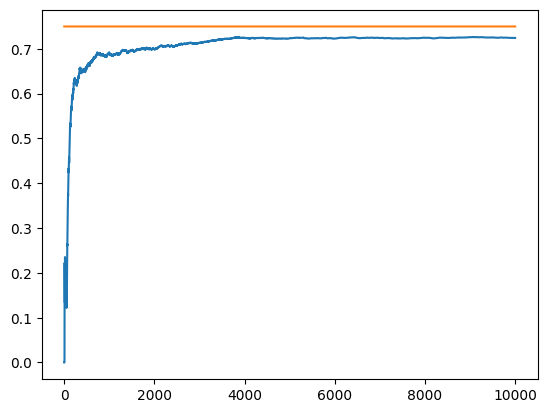

In [5]:
mab_c.plot_results()

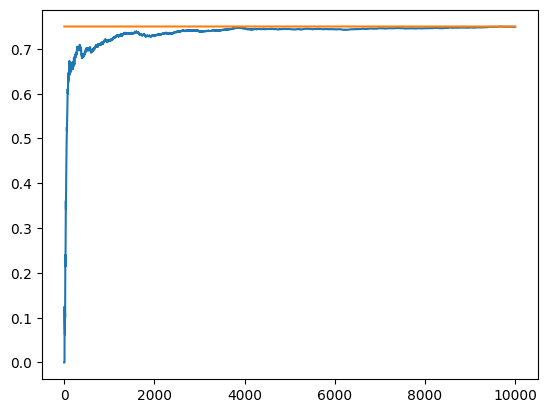

In [6]:
mab_l.plot_results()

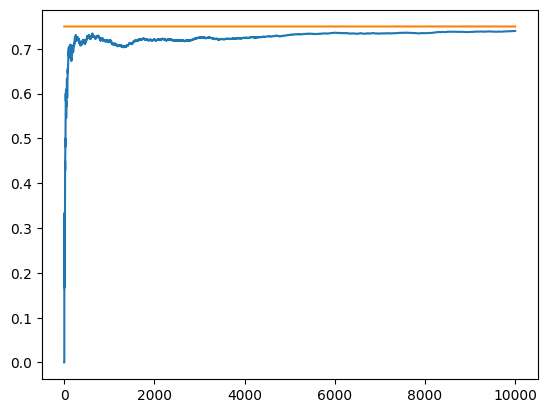

In [7]:
mab_e.plot_results()

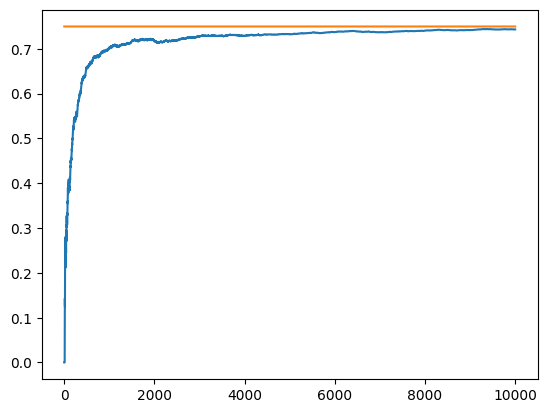

In [8]:
mab_i.plot_results()

## Example MAB with Optimistic Initial Values

In [1]:
from rl01.bandits import OptimisticInitialValues
from rl01.bandits import UpperConfidenceBound1

In [3]:
mab_oiv = OptimisticInitialValues(nbandits=3, initial_mean=6, probs=[0.2, 0.5, 0.75], ntrials=10000)

In [4]:
mab_oiv.experiment()

In [5]:
mab_oiv.calc_metrics()

Mean Estimate: ['1: 0.7440521317330958', '2: 0.7428713111650128', '3: 0.7555426386444751']
True Probability: ['1: 0.2', '2: 0.5', '3: 0.75']
Total Rewards Earned: 7538.0
Overall Win Rate: 0.7538
Times Explored: 51
Times Exploited: 9949
Times Selected Optimal Bandit: 9963
Times Selected Each Bandit: ['1: 9', '2: 30', '3: 9964']


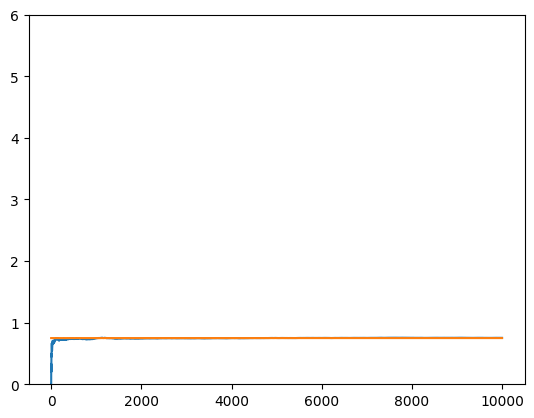

In [6]:
mab_oiv.plot_results(y_max=6)

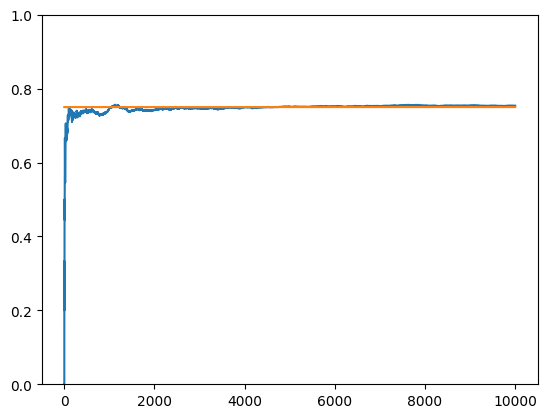

In [7]:
mab_oiv.plot_results(y_max=1)

In [2]:
mab_ucb1 = UpperConfidenceBound1(nbandits=3, probs=[0.2, 0.5, 0.75], ntrials=10000)

In [3]:
mab_ucb1.experiment()

In [4]:
mab_ucb1.calc_metrics()

Mean Estimate: ['1: 0.0', '2: 0.48148148148148145', '3: 0.7551143200962677']
True Probability: ['1: 0.2', '2: 0.5', '3: 0.75']
Total Rewards Earned: 7541.0
Overall Win Rate: 0.7541
Times Explored: 25
Times Exploited: 9975
Times Selected Optimal Bandit: 9971
Times Selected Each Bandit: ['1: 4', '2: 27', '3: 9972']


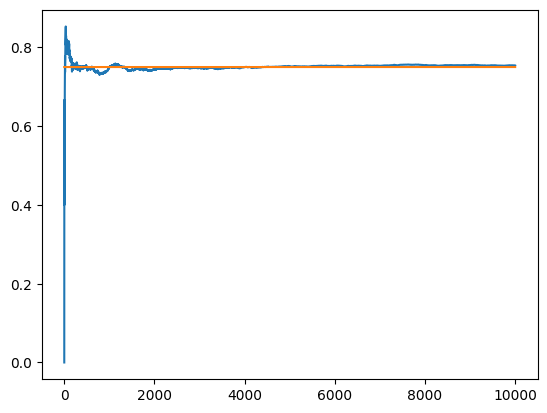

In [5]:
mab_ucb1.plot_results()